In [1]:
import cv2
import os
from PIL import Image
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Activation , Dropout, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.image as mpimg
import random as rn

In [2]:
image_directory = 'datasets/'

no_tumor_images = os.listdir(image_directory+'no/')

dataset = []
label= []

INPUT_SIZE=64

# print(no_tumor_images)

#path = "no0.jpg"
#print(path.split('.')[1])

#loading and resizing the no tumor images

for  image_name in tqdm(no_tumor_images):
    if(image_name.split('.')[1] == 'jpg'):
        image=cv2.imread(image_directory + 'no/' + image_name)
        image=Image.fromarray(image , 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)




100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:21<00:00, 69.55it/s]


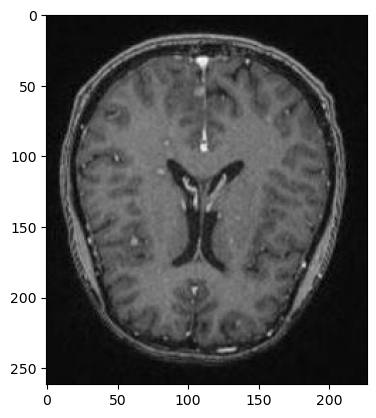

In [3]:
img_no = mpimg.imread('D:\\Minor_project\\datasets\\no\\no5.jpg')
imgplot = plt.imshow(img_no)


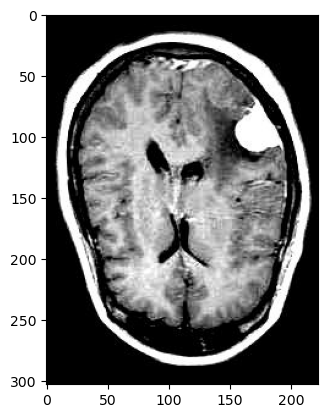

In [4]:
img_yes = mpimg.imread('D:\\Minor_project\\datasets\\yes\\y5.jpg')
imgplot = plt.imshow(img_yes)

In [5]:
yes_tumor_images = os.listdir(image_directory+'yes/')
for  image_name in tqdm(yes_tumor_images):
    if(image_name.split('.')[1] == 'jpg'):
        image=cv2.imread(image_directory + 'yes/' + image_name)
        image=Image.fromarray(image , 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

100%|██████████████████████████████████████████████████████████████████████████████| 1500/1500 [00:23<00:00, 63.41it/s]


In [6]:
#print(dataset)
#print(label)

dataset=np.array(dataset)
label=np.array(label)

Spliting data into test train split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(dataset,label, test_size=0.2,random_state=0)

#Reshape = (n, image_width, image_height, n_channel)

#print(x_train.shape)
#print(x_test.shape)
#print(y_train.shape)
#print(y_test.shape)

x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)


y_train=to_categorical(y_train, num_classes=2)
y_test=to_categorical(y_test, num_classes=2)


# Model Building

In [8]:
model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE,INPUT_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

#Binary CrossEntropy=1, sigmoid
#Categorical Cross Entropy=2 , softmax

model.compile(loss='categorical_crossentropy',optimizer='adam' , metrics=['accuracy'])


hist=model.fit(x_train, y_train, batch_size=16, verbose=1, epochs=10, validation_data=(x_test, y_test),shuffle=False)

model.save('BrainTumor10EpochsCategorical.h5')

Epoch 1/10
150/150 [==============================] - 11s 62ms/step - loss: 0.5469 - accuracy: 0.7425 - val_loss: 0.4845 - val_accuracy: 0.7850
Epoch 2/10
150/150 [==============================] - 9s 59ms/step - loss: 0.4090 - accuracy: 0.8225 - val_loss: 0.3943 - val_accuracy: 0.8133
Epoch 3/10
150/150 [==============================] - 10s 64ms/step - loss: 0.3317 - accuracy: 0.8592 - val_loss: 0.2843 - val_accuracy: 0.8717
Epoch 4/10
150/150 [==============================] - 9s 62ms/step - loss: 0.2680 - accuracy: 0.8933 - val_loss: 0.2286 - val_accuracy: 0.8983
Epoch 5/10
150/150 [==============================] - 9s 57ms/step - loss: 0.1912 - accuracy: 0.9308 - val_loss: 0.1718 - val_accuracy: 0.9433
Epoch 6/10
150/150 [==============================] - 9s 59ms/step - loss: 0.1406 - accuracy: 0.9504 - val_loss: 0.1273 - val_accuracy: 0.9583
Epoch 7/10
150/150 [==============================] - 9s 58ms/step - loss: 0.0882 - accuracy: 0.9696 - val_loss: 0.1326 - val_accuracy: 0.95

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 activation (Activation)     (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                    